# Decomposing a square matrix into eigenvectors and eigenvalues



In [1]:
import numpy as np

In [2]:
rng = np.random.default_rng()

## Create random eigenvectors

We'll start with a random 3x3 matrix, **X**, and compute its qr factorization, where q is orthonormal and r is upper-triangular. We'll use Q for our eigenvectors.

In [3]:
X = np.random.normal(size=(3,3))
print(X)

[[ 0.6502048   0.39966708 -1.81670214]
 [ 1.4408492  -1.24895529  0.10261562]
 [ 0.1102823  -0.57321404 -1.5791394 ]]


In [4]:
Q, R = np.linalg.qr(X)
print(Q)

[[-0.41032595  0.80474808  0.42896753]
 [-0.90927939 -0.32514094 -0.25979678]
 [-0.06959606 -0.49665269  0.86515461]]


### Q should be invertable, but let's make sure

In [5]:
np.linalg.det(Q)

0.9999999999999997

In [6]:
np.linalg.inv(Q)

array([[-0.41032595, -0.90927939, -0.06959606],
       [ 0.80474808, -0.32514094, -0.49665269],
       [ 0.42896753, -0.25979678,  0.86515461]])

$ \mathbf{Q}\mathbf{Q}^{-1} = \mathbf{I}$

In [7]:
Q @ np.linalg.inv(Q)

array([[ 1.00000000e+00,  1.28826407e-17, -4.59574664e-17],
       [-5.47385268e-17,  1.00000000e+00, -3.89780329e-17],
       [ 3.51231439e-17,  9.04769524e-18,  1.00000000e+00]])

## Create eigenvalues

Let's create a vector of eigenvalues in decreasing order: [a, a/2, a/3] = [6/11, 3/11, 2/11]. 

In [8]:
eigen_vals = np.array([6/11, 3/11, 2/11])

## Compose A

$ \mathbf{A}=\mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^{-1} $

In [9]:
A = Q @ np.diag(eigen_vals) @ np.linalg.inv(Q)
print(A)

[[ 0.30191718  0.11188611 -0.02595018]
 [ 0.11188611  0.49207933  0.03769192]
 [-0.02595018  0.03769192  0.20600349]]


## Now do the decomposition

Let's get back our eigenstuff.

In [10]:
eigen_vals, eigen_vectors = np.linalg.eig(A)

Annoyingly, it's not sorted, so let's sort it.

In [11]:
iis = np.flip(np.argsort(eigen_vals))
eigen_vals = eigen_vals[iis]
eigen_vectors = eigen_vectors[:,iis]

print(eigen_vals)
print(eigen_vectors)

[0.54545455 0.27272727 0.18181818]
[[-0.41032595 -0.80474808  0.42896753]
 [-0.90927939  0.32514094 -0.25979678]
 [-0.06959606  0.49665269  0.86515461]]


## Visualize eigenvectors in 2D

In [12]:
A = np.array(
    [[2.1, 1.4],
     [0.7, 1.3]]
)

In [13]:
v = np.array([[np.cos(theta), np.sin(theta)] for theta in np.linspace(0, 2*np.pi, num=100)])

In [14]:
import matplotlib.pyplot as plt

In [15]:
theta = np.linspace(0, 2*np.pi, num=100)
v = np.stack([np.cos(theta), np.sin(theta)])

In [16]:
v.shape

(2, 100)

In [17]:
u = A @ v

In [18]:
eigen_vals, eigen_vectors = np.linalg.eig(A)

In [19]:
eigen_vectors, eigen_vals

(array([[ 0.90259979, -0.69021933],
        [ 0.43048068,  0.72360022]]),
 array([2.76770783, 0.63229217]))

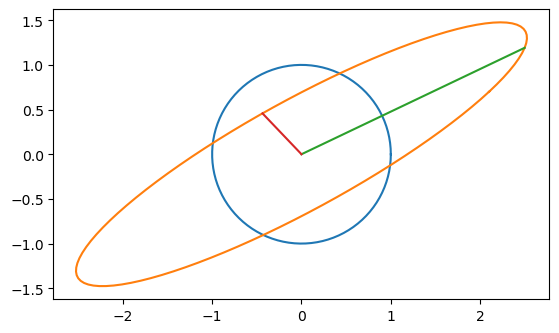

In [20]:
plt.axes().set_aspect('equal')

plt.plot(v[0,:], v[1,:])
plt.plot(u[0,:], u[1,:])

ev = np.stack([(0,0), eigen_vectors[:,0]]) * eigen_vals[0]
plt.plot(ev[:,0], ev[:,1])

ev = np.stack([(0,0), eigen_vectors[:,1]]) * eigen_vals[1]
plt.plot(ev[:,0], ev[:,1])